In [13]:

import pandas as pd, numpy as np, matplotlib.pyplot as plt

plt.rcParams.update({
    'font.family': 'Times New Roman',
    'font.size': 14
})

CSV_PATH = r"C:\Users\Ali\CS445\FinalStage3\data\annual_conc_by_monitor_2024.csv"

cols = ['State Name', 'City Name', 'Parameter Name', 'Arithmetic Mean']
df = pd.read_csv(CSV_PATH, usecols=cols)
print(f"Rows loaded: {len(df):,}")


POLLUTANTS = {
    'CO':   'Carbon monoxide',
    'NO₂':  'Nitrogen dioxide (NO2)',
    'PM2.5':'PM2.5 - Local Conditions',
    'PM10': 'PM10 Total 0-10 um STP',
    'SO₂':  'Sulfur dioxide',
    'O₃':   'Ozone'
}


Rows loaded: 59,175


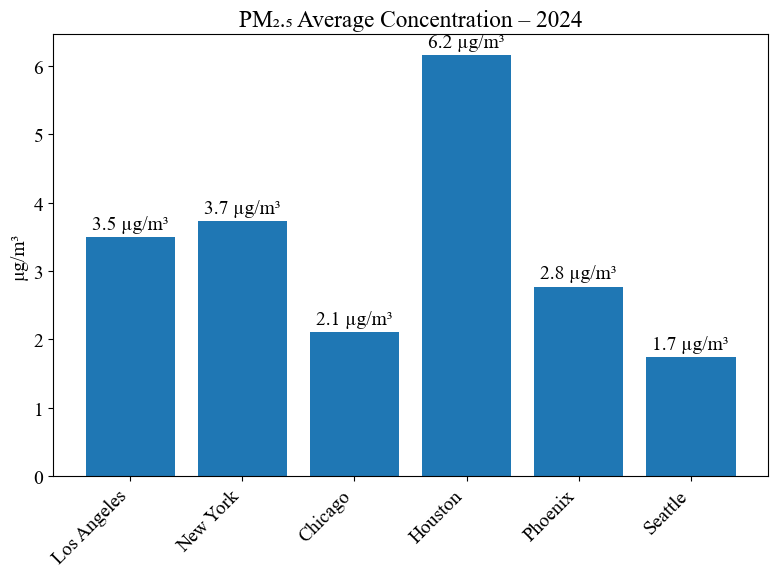

In [31]:
TARGET_CITIES = ['Los Angeles', 'New York', 'Chicago', 'Houston', 'Phoenix', 'Seattle']

pm = df[(df['Parameter Name'].str.contains('PM2.5')) & (df['City Name'].isin(TARGET_CITIES))]

city_means = pm.groupby('City Name')['Arithmetic Mean'].mean().loc[TARGET_CITIES]

fig, ax = plt.subplots(figsize=(8,6))
bars = ax.bar(city_means.index, city_means.values)


for bar in bars:
    height = bar.get_height()
    ax.annotate(f"{height:.1f} µg/m³",
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom')

ax.set(title='PM\u2082.₅ Average Concentration – 2024',
       ylabel='µg/m³')
plt.xticks(rotation=45, ha='right')
fig.tight_layout()
fig.savefig('fig_pm25_city_2024.png', dpi=300)

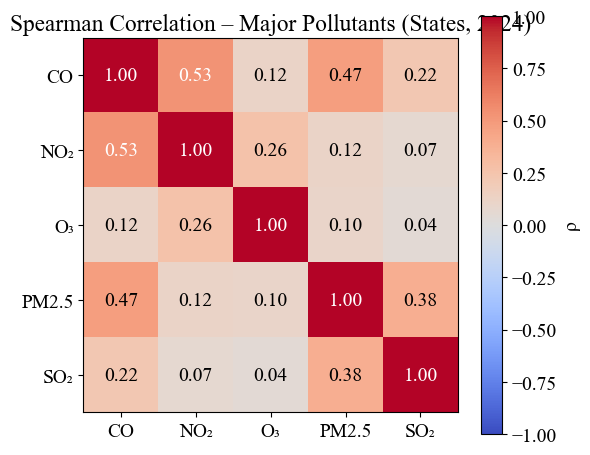

In [33]:
sub = df[df['Parameter Name'].isin(POLLUTANTS.values())].copy()
sub['Pollutant'] = sub['Parameter Name'].map({v: k for k, v in POLLUTANTS.items()})

state_tbl = sub.groupby(['State Name', 'Pollutant'])['Arithmetic Mean'] \
               .mean() \
               .unstack()

state_tbl = state_tbl.dropna(thresh=4)

corr = state_tbl.corr(method='spearman')

fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)

ax.set_xticks(np.arange(len(corr)), labels=corr.columns)
ax.set_yticks(np.arange(len(corr)), labels=corr.index)
for i in range(len(corr)):
    for j in range(len(corr)):
        ax.text(j, i, f"{corr.iloc[i, j]:.2f}",
                ha='center', va='center',
                color='white' if abs(corr.iloc[i, j]) > 0.5 else 'black')

ax.set_title('Spearman Correlation – Major Pollutants (States, 2024)')
fig.colorbar(im, ax=ax, label='ρ')
fig.tight_layout()
fig.savefig('fig_pollutant_corr_2024.png', dpi=300)

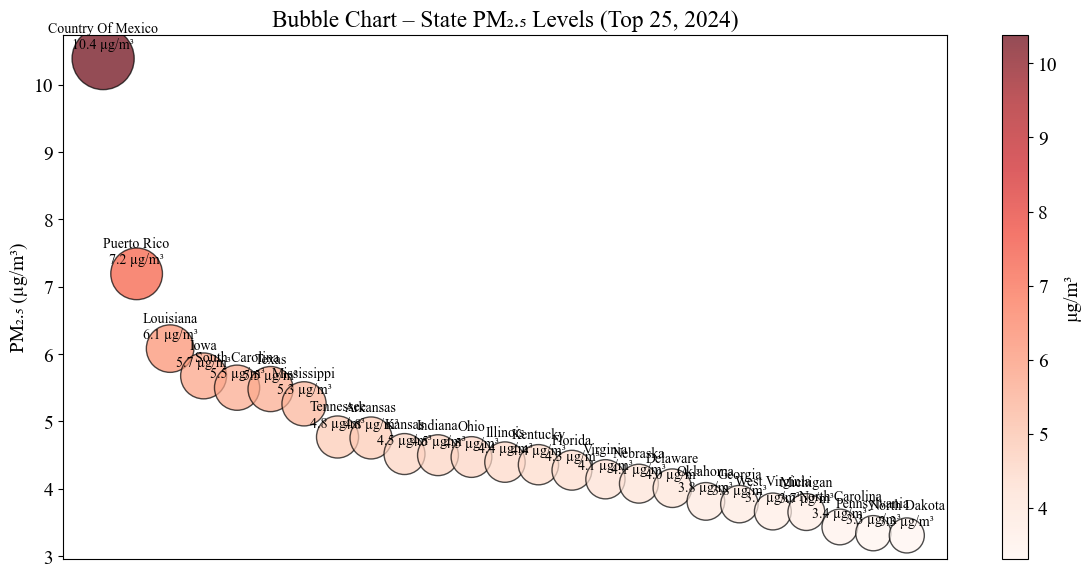

In [35]:
pm = df[df['Parameter Name'].str.contains('PM2.5')]

state_means = (
    pm.groupby('State Name')['Arithmetic Mean']
      .mean()
      .sort_values(ascending=False)
      .head(25)
)

x = np.arange(len(state_means))
y = state_means.values
sizes = (y / y.max()) * 2000
colors = y

fig, ax = plt.subplots(figsize=(12, 6))
sc = ax.scatter(x, y, s=sizes, c=colors, cmap='Reds', alpha=0.7, edgecolors='k')

for xi, yi, st in zip(x, y, state_means.index):
    ax.annotate(f"{st}\n{yi:.1f} µg/m³",
                (xi, yi),
                textcoords="offset points", xytext=(0, 5),
                ha='center', va='bottom', fontsize=10)

ax.set_xticks([])  # hide numeric x-axis; labels are in annotations
ax.set_ylabel('PM\u2082.₅ (µg/m³)')
ax.set_title('Bubble Chart – State PM\u2082.₅ Levels (Top 25, 2024)')

cbar = plt.colorbar(sc, ax=ax, label='µg/m³')
fig.tight_layout()
fig.savefig('fig_pm25_state_bubble_2024.png', dpi=300)
plt.show()